Creating sample data...


/tmp/ipykernel_39234/21615495.py:38: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.resample('M')['revenue'].sum()


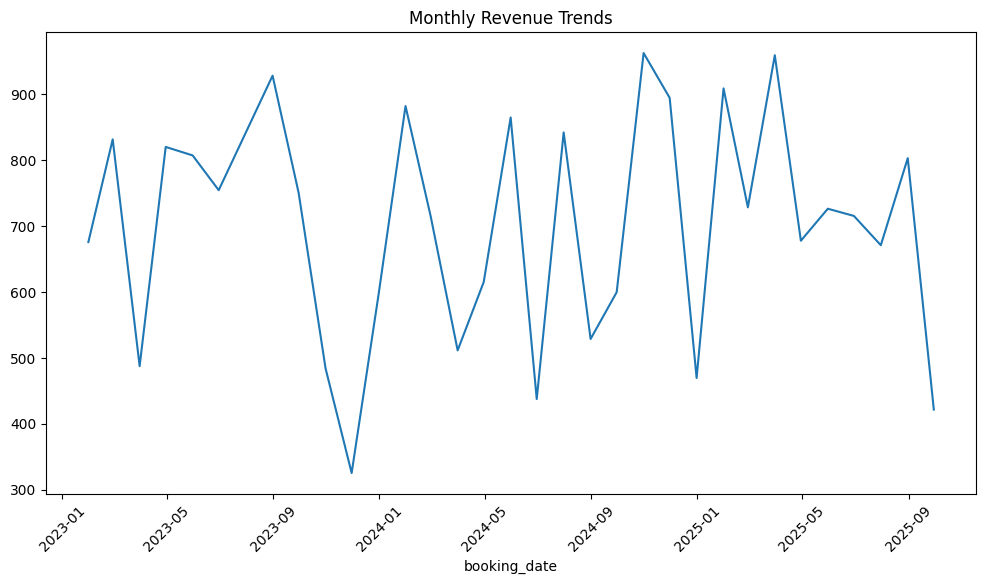

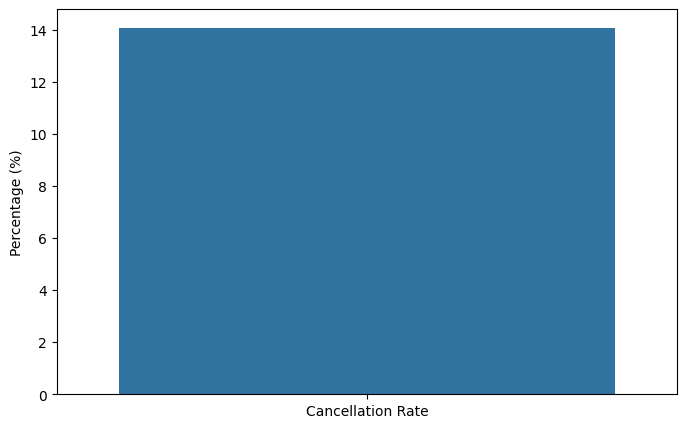

/tmp/ipykernel_39234/21615495.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')


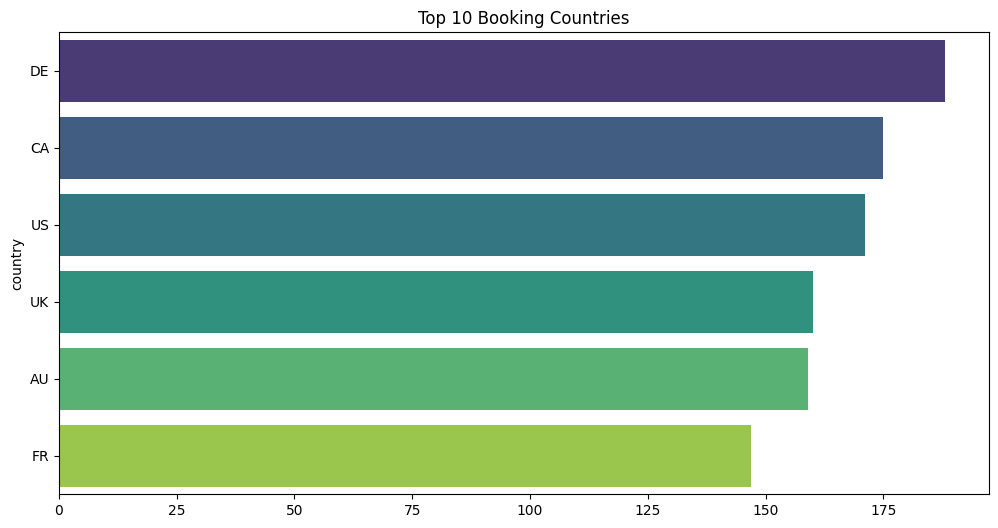

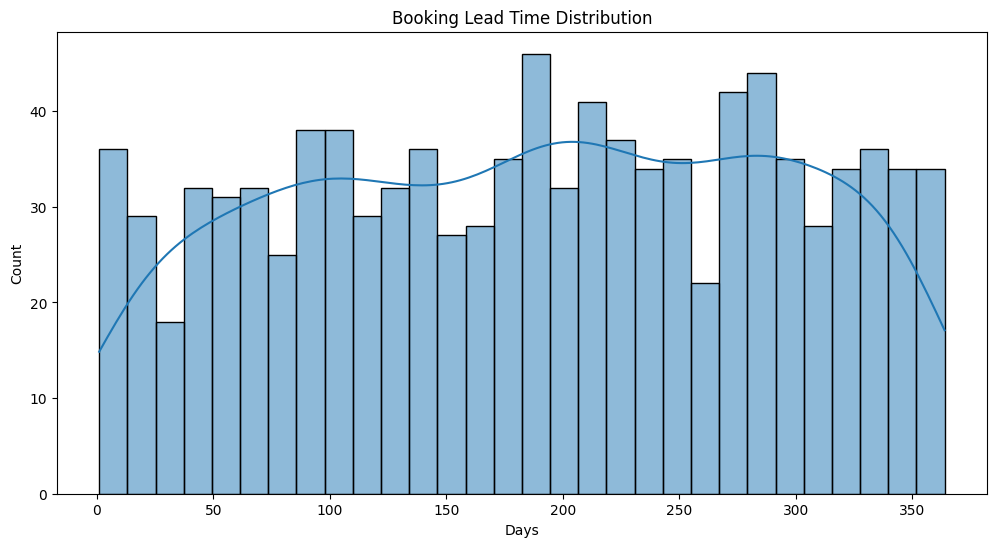

In [1]:
# analytics_test.ipynb

# Required Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Generate Sample Data (if you don't have a dataset)
def create_sample_data():
    np.random.seed(42)
    dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
    data = {
        'booking_date': np.random.choice(dates, 1000),
        'revenue': np.random.lognormal(mean=3, sigma=0.5, size=1000).round(2),
        'is_canceled': np.random.choice([0, 1], 1000, p=[0.85, 0.15]),
        'country': np.random.choice(['US', 'UK', 'DE', 'FR', 'CA', 'AU'], 1000),
        'lead_time': np.random.randint(1, 365, 1000)
    }
    return pd.DataFrame(data)

# Load/Create Data
try:
    df = pd.read_csv('..Data/hotel_bookings.csv')
except FileNotFoundError:
    print("Creating sample data...")
    df = create_sample_data()
    df.to_csv('booking_data.csv', index=False)

# Data Preparation
df['booking_date'] = pd.to_datetime(df['booking_date'])
df.set_index('booking_date', inplace=True)

# Analytics Functions
def show_revenue_trends():
    plt.figure(figsize=(12, 6))
    monthly_revenue = df.resample('M')['revenue'].sum()
    sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values)
    plt.title('Monthly Revenue Trends')
    plt.xticks(rotation=45)
    plt.show()

def show_cancellation_rate():
    plt.figure(figsize=(8, 5))
    cancellation_rate = (df['is_canceled'].sum() / len(df)) * 100
    sns.barplot(x=['Cancellation Rate'], y=[cancellation_rate])
    plt.ylabel('Percentage (%)')
    plt.show()

def show_geo_distribution():
    plt.figure(figsize=(12, 6))
    country_counts = df['country'].value_counts().head(10)
    sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
    plt.title('Top 10 Booking Countries')
    plt.show()

def show_lead_time_distribution():
    plt.figure(figsize=(12, 6))
    sns.histplot(df['lead_time'], bins=30, kde=True)
    plt.title('Booking Lead Time Distribution')
    plt.xlabel('Days')
    plt.show()

# Test All Visualizations
show_revenue_trends()
show_cancellation_rate()
show_geo_distribution()
show_lead_time_distribution()